In [500]:
%matplotlib inline

In [501]:
import numpy as np
import matplotlib.pyplot as plt
import obspy as op
import glob
import os
import fnmatch
import shutil
import matplotlib.gridspec as gridspec
from scipy import signal,stats,spatial,misc
from obspy.taup import TauPyModel
from  time import sleep
import matplotlib.gridspec as gridspec
from obspy.clients.fdsn import Client
from obspy.clients.iris import Client as OldIris_Client
from obspy.core.util import NamedTemporaryFile
from mpl_toolkits.basemap import Basemap
import matplotlib.mlab as mlab
import itertools
from obspy import UTCDateTime
from matplotlib.cbook import get_sample_data
import re
from ipywidgets import interact, interactive, fixed, interact_manual, Checkbox
import ipywidgets as widgets
from IPython.display import display

<h3 align="center">Recolhendo as Funções do Receptor</h3>

In [502]:
STA = ['BDCO','BPPF','BUCO','GENI','GRJU','PRDT','STSN','STSR','TRZN']

In [503]:
datalistr = []
datalistSr = []
dir_listr = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/rede_BB/event_data/'):
    for datafile in files:
        if datafile.endswith('.eqr'):
            datalistr.append(os.path.join(root, datafile))
datalistSr = sorted(datalistr)

datalistt = []
datalistSt = []
dir_listt = []
for root, dirs, files in os.walk('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/transition_zone/rede_BB/event_data/'):
    for datafile in files:
        if datafile.endswith('.eqt'):
            datalistt.append(os.path.join(root, datafile))
datalistSt = sorted(datalistt)

In [504]:
a1r = []
a25r = []
a05r = []

for i,j in enumerate(datalistSr):
    if 'a=1.0' in j:
        a1r.append(j)
    elif 'a=2.5' in j:
        a25r.append(j)
    else:
        a05r.append(j)
        
a1t = []
a25t = []
a05t = []
for i,j in enumerate(datalistSt):
    if 'a=1.0' in j:
        a1t.append(j)
    elif 'a=2.5' in j:
        a25t.append(j)
    else:
        a05t.append(j)

In [505]:
a1r_name = [i.split('/')[12] for i in a1r]
a1t_name = [i.split('/')[12] for i in a1t]
a25r_name = [i.split('/')[12] for i in a25r]
a25t_name = [i.split('/')[12] for i in a25t]
a05r_name = [i.split('/')[12] for i in a05r]
a05t_name = [i.split('/')[12] for i in a05t]

In [506]:
RF_list_r = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r[l].append(j)
            
RF_list_r_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_25[l].append(j)
            
RF_list_r_05 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a05r):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_r_05[l].append(j)

<h3 align="center">Separando as Funções do Receptor por Estação</h3>

In [507]:
RF_list_t = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a1t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t[l].append(j)
            
RF_list_t_25 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a25t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_25[l].append(j)
            
RF_list_t_05 = [[],[],[],[],[],[],[],[],[]]
for i,j in enumerate(a05t):
    for l,k in enumerate(STA):
        if k in j:
            RF_list_t_05[l].append(j)

<h3 align="center">Separando as Funções do Receptor pela distância Epicentral (gcarc)</h3>

BDCO = 0, BPPF = 1 ,BUCO = 2, GENI = 3, GRJU = 4, PRDT = 5, STNS = 6, STSR = 7, TRZN = 8

In [508]:
z = 0

<h3 align="center">a = 1.0</h3>

In [509]:
RF = []
RF_name_r = []

for i,j in enumerate(RF_list_r[z]):
    a = op.read(j)
    if a[0].stats.sac.gcarc > 30:
        RF += op.read(j)
        RF_name_r.append(j.split('/')[11])

In [510]:
RF_name = [i.split('.eqr')[0] for i in RF_name_r]

In [511]:
TF = []
for i,j in enumerate(RF_list_t[z]):
    for l,k in enumerate(RF_name):
        if k in j:
            TF += op.read(j)

<h3 align="center">a = 2.5</h3>

In [512]:
RF_25 = []
RF_name_r_25 = []

for i,j in enumerate(RF_list_r_25[z]):
    a = op.read(j)
    if a[0].stats.sac.gcarc > 30:
        RF_25 += op.read(j)
        RF_name_r_25.append(j.split('/')[11])

In [513]:
RF_name_25 = [i.split('.eqr')[0] for i in RF_name_r_25]

In [514]:
TF_25 = []
for i,j in enumerate(RF_list_t_25[z]):
    for l,k in enumerate(RF_name_25):
        if k in j:
            TF_25 += op.read(j)

<h3 align="center">a = 0.5</h3>

In [515]:
RF_05 = []
RF_name_r_05 = []

for i,j in enumerate(RF_list_r_05[z]):
    a = op.read(j)
    if a[0].stats.sac.gcarc > 30:
        RF_05 += op.read(j)
        RF_name_r_05.append(j.split('/')[11])

In [516]:
RF_name_05 = [i.split('.eqr')[0] for i in RF_name_r_05]

In [517]:
TF_05 = []
for i,j in enumerate(RF_list_t_05[z]):
    for l,k in enumerate(RF_name_05):
        if k in j:
            TF_05 += op.read(j)

<h3 align="center">Separando as Funções do Receptor pela porcentagem da deconvolução</h3>

<h3 align="center">a = 1.0</h3>

In [585]:
RF_30_st = op.Stream()
RF_30 = []
TF_30 = []
RF_name_30 = []
for i,j in enumerate(RF):
    if j.stats.sac.user5 > 80:
        RF_30_st.append(j)
        TF_30.append(TF[i])
        RF_name_30.append(RF_name[i])

In [586]:
for i,j in enumerate(RF_30_st):
    RF_30.append(j)

In [587]:
len(RF_30_st)

69

<h3 align="center">a = 2.5</h3>

In [591]:
RF_30_25_st = op.Stream()
RF_30_25 = []
TF_30_25 = []
RF_name_30_25 = []
for i,j in enumerate(RF_25):
    if j.stats.sac.user5 > 75:
        RF_30_25_st.append(j)
        TF_30_25.append(TF_25[i])
        RF_name_30_25.append(RF_name_25[i])

In [592]:
for i,j in enumerate(RF_30_25_st):
    RF_30_25.append(j)

In [593]:
len(RF_30_25)

78

<h3 align="center">a = 0.5</h3>

In [594]:
RF_30_05_st = op.Stream()
RF_30_05 = []
TF_30_05 = []
RF_name_30_05 = []
for i,j in enumerate(RF_05):
    if j.stats.sac.user5 > 85:
        RF_30_05_st.append(j)
        TF_30_05.append(TF_05[i])
        RF_name_30_05.append(RF_name_05[i])

In [595]:
for i,j in enumerate(RF_30_05_st):
    RF_30_05.append(j)

In [596]:
len(RF_30_05)

68

<h3 align="center">Plotando as Funções do Receptor</h3>

<h3 align="center">a = 1.0</h3>

In [597]:
RFgcarc_30 = [i.stats.sac.gcarc for i in RF_30]
RFevdp_30 = [i.stats.sac.evdp for i in RF_30]
RFbaz_30 = [i.stats.sac.baz for i in RF_30]
RFp_30 = [i.stats.sac.user8 for i in RF_30]

orglisl_30 = np.argsort(RFp_30)

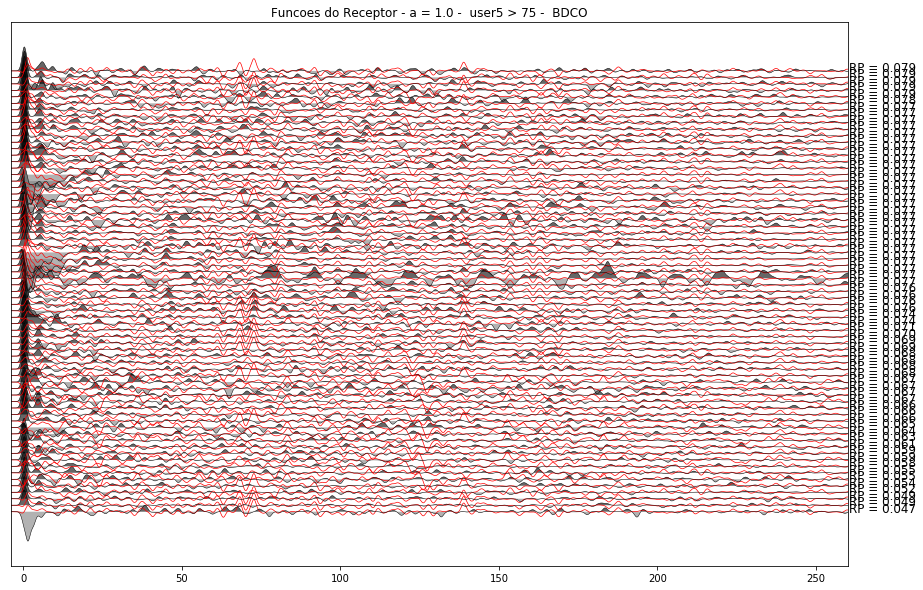

In [598]:
factor = 10
plt.figure(figsize = (15,10))
for j, i in enumerate(orglisl_30): 
    plt.plot(TF_30[i].times()-10,j/factor+TF_30[i].data,'r',linewidth=0.7)
    plt.plot(RF_30[i].times()-10,j/factor+RF_30[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_30[i].times()-10,j/factor+RF_30[i].data,j/factor,where=(j/factor+RF_30[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_30[i].times()-10,j/factor+RF_30[i].data,j/factor,where=(j/factor+RF_30[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/factor,'GCARC = %s' % (RFgcarc_30[i]),fontsize=12)
    #plt.text(50.5,j/factor,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    plt.text(260.5,j/factor,"RP = "+"{0:.3f}".format(RFp_30[i]),fontsize=12)
    #plt.text(40.5,j/factor,'BAZ = %s' % (RFbaz_30[i]),fontsize=7)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 -  user5 > 75 -  '+STA[z])
    plt.xlim(-4,260)



<h3 align="center">a = 2.5</h3>

In [572]:
RFgcarc_30_25 = [i.stats.sac.gcarc for i in RF_30_25]
RFevdp_30_25 = [i.stats.sac.evdp for i in RF_30_25]
RFbaz_30_25 = [i.stats.sac.baz for i in RF_30_25]
RFp_30_25 = [i.stats.sac.user8 for i in RF_30_25]

orglisl_30_25 = np.argsort(RFbaz_30_25)

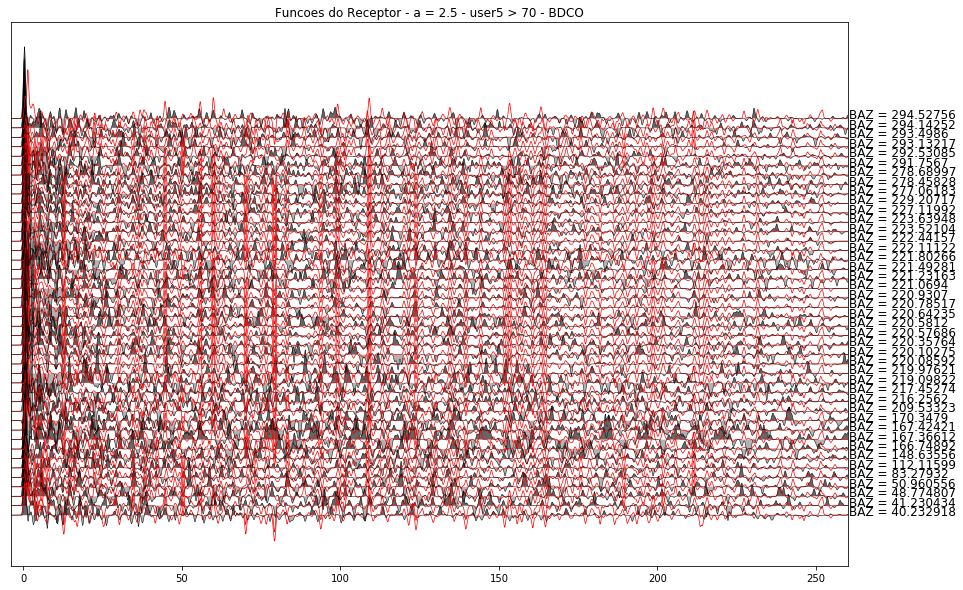

In [599]:
factor = 10
plt.figure(figsize = (15,10))
for j, i in enumerate(orglisl_30_25): 
    plt.plot(TF_30_25[i].times()-10,j/factor+TF_30_25[i].data,'r',linewidth=0.7)
    plt.plot(RF_30_25[i].times()-10,j/factor+RF_30_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_30_25[i].times()-10,j/factor+RF_30_25[i].data,j/factor,where=(j/factor+RF_30_25[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_30_25[i].times()-10,j/factor+RF_30_25[i].data,j/factor,where=(j/factor+RF_30_25[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/factor,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/factor,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    #plt.text(40.5,j/factor,"RP = "+"{0:.3f}".format(RFp_30_25[i]),fontsize=12)
    plt.text(260.5,j/factor,'BAZ = %s' % (RFbaz_30_25[i]),fontsize=12)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - user5 > 70 - '+STA[z])
    plt.xlim(-4,260)

<h3 align="center">a = 0.5</h3>

In [600]:
RFgcarc_30_05 = [i.stats.sac.gcarc for i in RF_30_05]
RFevdp_30_05 = [i.stats.sac.evdp for i in RF_30_05]
RFbaz_30_05 = [i.stats.sac.baz for i in RF_30_05]
RFp_30_05 = [i.stats.sac.user8 for i in RF_30_05]

orglisl_30_05 = np.argsort(RFbaz_30_05)

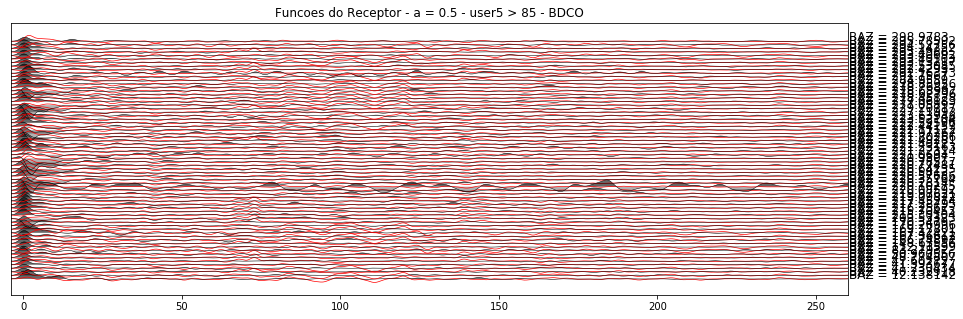

In [606]:
factor = 10
plt.figure(figsize = (15,5))
for j, i in enumerate(orglisl_30_05): 
    plt.plot(TF_30_05[i].times()-10,j/factor+TF_30_05[i].data,'r',linewidth=0.7)
    plt.plot(RF_30_05[i].times()-10,j/factor+RF_30_05[i].data,'k',linewidth=0.5)
    plt.fill_between(RF_30_05[i].times()-10,j/factor+RF_30_05[i].data,j/factor,where=(j/factor+RF_30_05[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RF_30_05[i].times()-10,j/factor+RF_30_05[i].data,j/factor,where=(j/factor+RF_30_05[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/factor,'GCARC = %s' % (RFgcarc_30_05[i]),fontsize=12)
    #plt.text(50.5,j/factor,'evdp = %s' % (RFevdp_30_05[i]),fontsize=12)
    #plt.text(40.5,j/factor,"RP = "+"{0:.3f}".format(RFp_30_05[i]),fontsize=12)
    plt.text(260.5,j/factor,'BAZ = %s' % (RFbaz_30_05[i]),fontsize=12)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 0.5 - user5 > 85 - '+STA[z])
    plt.xlim(-4,260)

<h3 align="center">Empilhando as Funções do Receptor após a filtragem</h3>

<h3 align="center">a = 1.0 </h3>

In [607]:
RF_stack_30 = np.array(RF_30).sum(axis=0)/len(RF_30)

In [608]:
y = []
for i,j in enumerate(RF_30): 
    y.append(j.data)

In [609]:
min_y = [min(a) for a in zip(*y)]
max_y = [max(a) for a in zip(*y)]

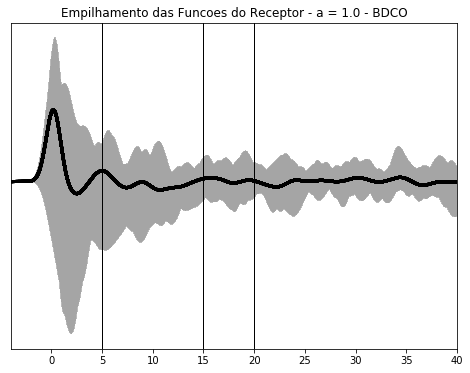

In [610]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RF_30): 
    plt.plot(RF[1].times()-10,RF_stack_30,'k',linewidth=3)
    plt.fill_between(RF_30[0].times()-10,min_y,max_y, facecolor='grey',alpha=0.01, interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,40)

<h3 align="center">a = 2.5 </h3>

In [611]:
RF_stack_30_25 = np.array(RF_30_25).sum(axis=0)/len(RF_30_25)

In [612]:
y_25 = []
for i,j in enumerate(RF_30_25): 
    y_25.append(j.data)

In [613]:
min_y_25 = [min(a) for a in zip(*y_25)]
max_y_25 = [max(a) for a in zip(*y_25)]

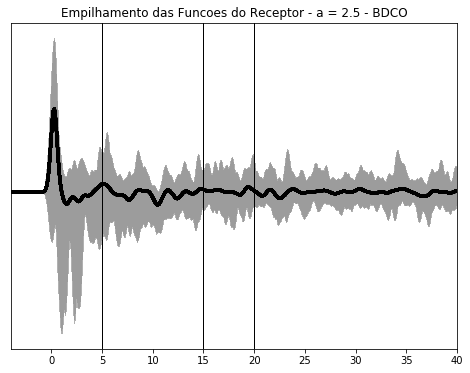

In [614]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RF_30_25): 
    plt.plot(RF[1].times()-10,RF_stack_30_25,'k',linewidth=3)
    plt.fill_between(RF_30_25[0].times()-10,min_y_25,max_y_25,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,40)

<h3 align="center">a = 0.5 </h3>

In [615]:
RF_stack_30_05 = np.array(RF_30_05).sum(axis=0)/len(RF_30_05)

In [616]:
y_05 = []
for i,j in enumerate(RF_30_05): 
    y_05.append(j.data)

In [617]:
min_y_05 = [min(a) for a in zip(*y_05)]
max_y_05 = [max(a) for a in zip(*y_05)]

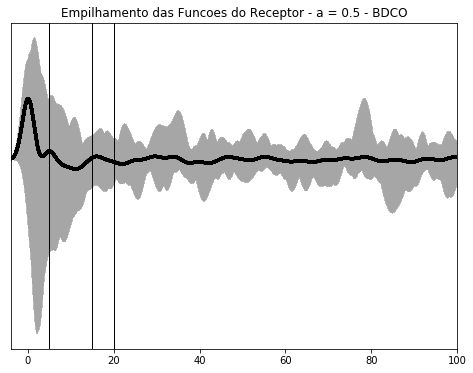

In [618]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RF_30_05): 
    plt.plot(RF[1].times()-10,RF_stack_30_05,'k',linewidth=3)
    plt.fill_between(RF_30_05[0].times()-10,min_y_05,max_y_05,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento das Funcoes do Receptor - a = 0.5 - '+STA[z])
    plt.xlim(-4,100)

<h3 align="center">Filtragem Visual das Funções do Receptor selecionadas</h3>

<h3 align="center">a = 1.0 </h3>

In [620]:
box1 = widgets.Button(description="1",button_style='success')
box2 = widgets.Button(description="0",button_style='danger')
btns= [box1,box2]
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch')
box = Box(children=btns, layout=box_layout)

display(box)

RFselect = []
def changed(b):
    RFselect.append(b.description)
box1.on_click(changed)
box2.on_click(changed)

w = widgets.Select(
    options=RF_30,
    rows=len(RF_30),
    disabled=False,
    layout=widgets.Layout(width='80%', height='200px')
)

def f(RF_data):

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(RF_data.times()-10,RF_data.data,'k',linewidth=3)
    ax.plot(RF_30[1].times()-10,RF_stack_30,'--r',linewidth=1)
    ax.fill_between(RF_30[0].times()-10,min_y,max_y,alpha=0.2, facecolor='grey',interpolate=True)
    ax.set_xlim(-4,100)

interactive_plot = interactive(f,RF_data=w)
output = interactive_plot.children[-1]
output.layout.height = '400px'
output.layout.Positioning = 'right'
interactive_plot

Box(children=(Button(button_style='success', description='1', style=ButtonStyle()), Button(button_style='danger', description='0', style=ButtonStyle())), layout=Layout(align_items='stretch', display='flex', flex_flow='row'))

interactive(children=(Select(description='RF_data', layout=Layout(height='200px', width='80%'), options=(<obspy.core.trace.Trace object at 0x7fe11f3f4ef0>, <obspy.core.trace.Trace object at 0x7fe11f3e3400>, <obspy.core.trace.Trace object at 0x7fe10c89ed30>, <obspy.core.trace.Trace object at 0x7fe11f381c18>, <obspy.core.trace.Trace object at 0x7fe11f38feb8>, <obspy.core.trace.Trace object at 0x7fe11f387710>, <obspy.core.trace.Trace object at 0x7fe11f38cb38>, <obspy.core.trace.Trace object at 0x7fe11f38c048>, <obspy.core.trace.Trace object at 0x7fe109570b38>, <obspy.core.trace.Trace object at 0x7fe108fa3278>, <obspy.core.trace.Trace object at 0x7fe11f3abf60>, <obspy.core.trace.Trace object at 0x7fe11f34c0b8>, <obspy.core.trace.Trace object at 0x7fe11f34a3c8>, <obspy.core.trace.Trace object at 0x7fe11f347f98>, <obspy.core.trace.Trace object at 0x7fe11f34f7b8>, <obspy.core.trace.Trace object at 0x7fe11f3476a0>, <obspy.core.trace.Trace object at 0x7fe11f3bb0f0>, <obspy.core.trace.Trace object at 0x7fe11f35c1d0>, <obspy.core.trace.Trace object at 0x7fe11f353128>, <obspy.core.trace.Trace object at 0x7fe11f301c88>, <obspy.core.trace.Trace object at 0x7fe109df7a20>, <obspy.core.trace.Trace object at 0x7fe11f383f60>, <obspy.core.trace.Trace object at 0x7fe109df22b0>, <obspy.core.trace.Trace object at 0x7fe11f420b00>, <obspy.core.trace.Trace object at 0x7fe11f480fd0>, <obspy.core.trace.Trace object at 0x7fe11f425908>, <obspy.core.trace.Trace object at 0x7fe11f4185c0>, <obspy.core.trace.Trace object at 0x7fe1095176a0>, <obspy.core.trace.Trace object at 0x7fe109517ac8>, <obspy.core.trace.Trace object at 0x7fe10d3cc9b0>, <obspy.core.trace.Trace object at 0x7fe11f4256a0>, <obspy.core.trace.Trace object at 0x7fe10d3cc780>, <obspy.core.trace.Trace object at 0x7fe10d3ec160>, <obspy.core.trace.Trace object at 0x7fe109d9a780>, <obspy.core.trace.Trace object at 0x7fe109b4bd68>, <obspy.core.trace.Trace object at 0x7fe109b4b390>, <obspy.core.trace.Trace object at 0x7fe109dc7828>, <obspy.core.trace.Trace object at 0x7fe109541208>, <obspy.core.trace.Trace object at 0x7fe113cc8748>, <obspy.core.trace.Trace object at 0x7fe113cc8dd8>, <obspy.core.trace.Trace object at 0x7fe113ccbda0>, <obspy.core.trace.Trace object at 0x7fe113dc8b00>, <obspy.core.trace.Trace object at 0x7fe108676b70>, <obspy.core.trace.Trace object at 0x7fe108663c50>, <obspy.core.trace.Trace object at 0x7fe10d062978>, <obspy.core.trace.Trace object at 0x7fe10d062278>, <obspy.core.trace.Trace object at 0x7fe115bd2240>, <obspy.core.trace.Trace object at 0x7fe10d062390>, <obspy.core.trace.Trace object at 0x7fe1092b5860>, <obspy.core.trace.Trace object at 0x7fe10d4889e8>, <obspy.core.trace.Trace object at 0x7fe1093aa7f0>, <obspy.core.trace.Trace object at 0x7fe10bf67c50>, <obspy.core.trace.Trace object at 0x7fe10bdd2f60>, <obspy.core.trace.Trace object at 0x7fe113eb0e10>, <obspy.core.trace.Trace object at 0x7fe108d42ba8>, <obspy.core.trace.Trace object at 0x7fe10e251eb8>, <obspy.core.trace.Trace object at 0x7fe113219278>, <obspy.core.trace.Trace object at 0x7fe10e2512b0>, <obspy.core.trace.Trace object at 0x7fe108fe1a90>, <obspy.core.trace.Trace object at 0x7fe112f17828>, <obspy.core.trace.Trace object at 0x7fe113219c50>, <obspy.core.trace.Trace object at 0x7fe10890f2b0>, <obspy.core.trace.Trace object at 0x7fe112e89b00>, <obspy.core.trace.Trace object at 0x7fe10890fc18>, <obspy.core.trace.Trace object at 0x7fe10890f940>, <obspy.core.trace.Trace object at 0x7fe10c086c50>, <obspy.core.trace.Trace object at 0x7fe108b9fe80>, <obspy.core.trace.Trace object at 0x7fe10c086fd0>, <obspy.core.trace.Trace object at 0x7fe10d2ea518>), rows=69, value=<obspy.core.trace.Trace object at 0x7fe11f3f4ef0>), Output(layout=Layout(height='400px'))), _dom_classes=('widget-interact',))

In [492]:
print(RFselect)

['1', '1', '0', '0', '1', '0', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0']


In [496]:
new_RFfilter = [True if x =='1' else False for x in RFselect]

In [498]:
len(new_RFfilter)

68

In [526]:
len(RF_30_05)

68

In [527]:
RFRbom_30 = list(itertools.compress(RF_30_05, new_RFfilter))
RFTbom_30 = list(itertools.compress(TF_30_05, new_RFfilter))
RFbomname_30 = list(itertools.compress(RF_name_30, new_RFfilter))

In [528]:
RF_bom_gcarc_30 = [i.stats.sac.gcarc for i in RFRbom_30]
RF_bom_baz_30 = [i.stats.sac.baz for i in RFRbom_30]
RF_bom_p_30 = [i.stats.sac.user8 for i in RFRbom_30]


orglisl_bom_30 = np.argsort(RF_bom_p_30)

In [529]:
len(orglisl_bom_30)

55

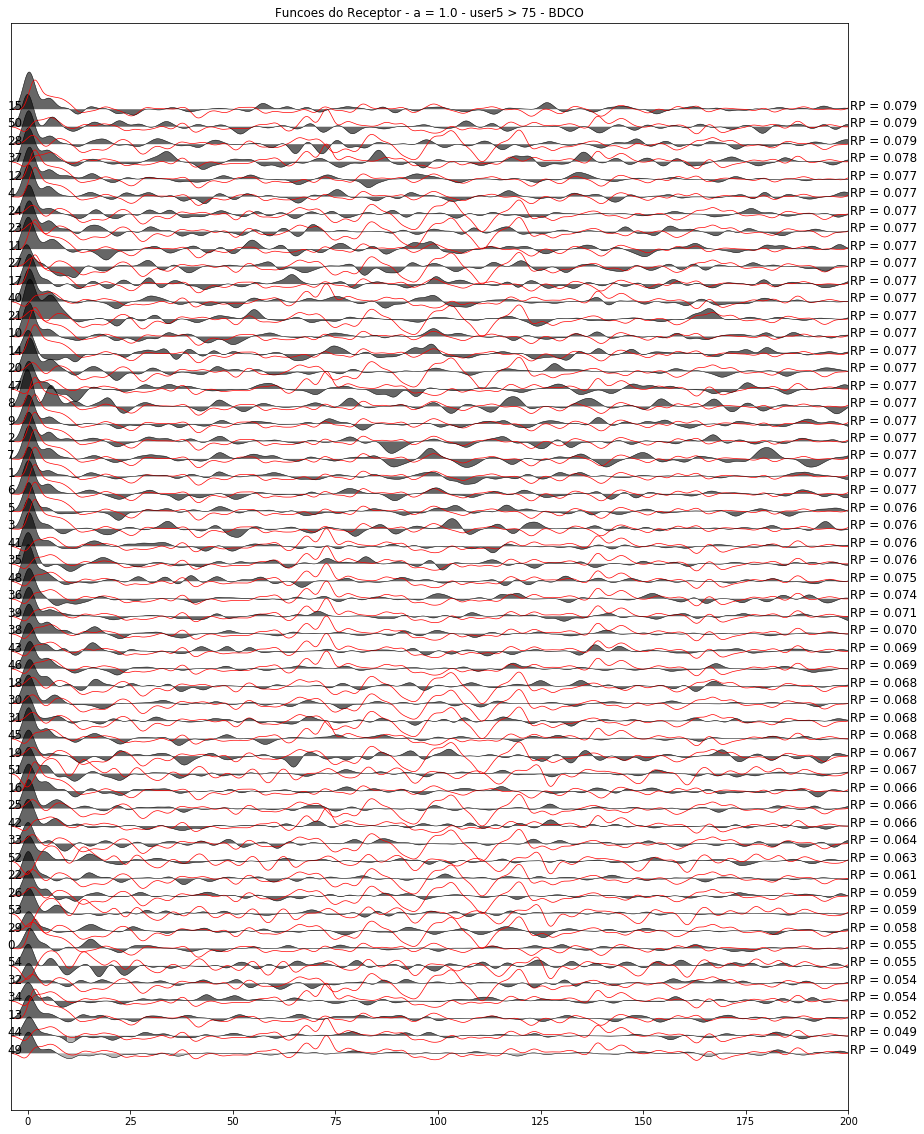

In [530]:
plt.figure(figsize = (15,20))
factor_1 = 10
extent_graph = 200
for j, i in enumerate(orglisl_bom_30): 
    plt.plot(RFTbom_30[i].times()-10,j/factor_1+RFTbom_30[i].data,'r',linewidth=0.7)
    plt.plot(RFRbom_30[i].times()-10,j/factor_1+RFRbom_30[i].data,'k',linewidth=0.5)
    plt.fill_between(RFRbom_30[i].times()-10,j/factor_1+RFRbom_30[i].data,j/factor_1,where=(j/factor_1+RFRbom_30[i].data)>=j/15, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RFRbom_30[i].times()-10,j/factor_1+RFRbom_30[i].data,j/factor_1,where=(j/factor_1+RFRbom_30[i].data)<=j/15, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/10,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/10,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    plt.text(-5,j/factor_1,str(i),fontsize=12)
    plt.text(extent_graph+0.5,j/factor_1,"RP = "+"{0:.3f}".format(RF_bom_p_30[i]),fontsize=12)
    #plt.text(40.5,j/factor_1,'BAZ = %s' % (RF_bom_baz_30[i]),fontsize=12)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 1.0 - user5 > 75 - '+STA[z])
    plt.xlim(-4,extent_graph)

In [ ]:
FR_normalized = op.Stream()

for j, i in enumerate(orglisl_bom_30): 
    FR_normalized.append(RFRbom_30[i])

In [ ]:
FR_normalized.normalize()

In [ ]:
FR = []
RP = []
for j, i in enumerate(orglisl_bom_30): 
    FR.append(FR_normalized[i].data)
    time = RFRbom_30[i].times()
    RP.append(FR_normalized[i].stats.sac.user8)

In [ ]:
Z = np.array(FR)

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(5, 10))

majorLocatorX = MultipleLocator(300)
majorLocatorY = MultipleLocator(100)
minorLocatorY = MultipleLocator(20)
minorLocatorX = MultipleLocator(10)


#Sismograma sem filtro PP
v= 0.1
im = ax.imshow(Z.T, interpolation='bicubic', cmap=cm.viridis,
                origin='upper', aspect='auto',
                vmax=v, vmin=-v)
                #vmax=abs(Z.min()), vmin=Z.min())

                
ax.set_ylim(2700,100)
ax.xaxis.set_major_locator(majorLocatorX)
ax.yaxis.set_major_locator(majorLocatorY)
ax.xaxis.set_minor_locator(minorLocatorX)
ax.yaxis.set_minor_locator(minorLocatorY)
ax.set_ylabel('Time after P (s)')
ax.set_xlabel('Slowness')
ax.grid(True)
ax.set_yticklabels(["{0:.0f}".format(time[i]) for i in np.arange(-100,len(time),100)])
ax.set_xticklabels(["{0:.1f}".format(RP[i]*100) for i in np.arange(0,len(RP),300)])


In [ ]:
RF_stack_30_final = np.array(RFRbom_30).sum(axis=0)/len(RFRbom_30)

In [ ]:
RFT_stack_30_final = np.array(RFTbom_30).sum(axis=0)/len(RFTbom_30)

In [ ]:
RF_stack_30_final_user8 = sum([i.stats.sac.user8 for i in RFRbom_30])/len(RFRbom_30)

In [ ]:
y_30_final = []
for i,j in enumerate(RFRbom_30): 
    y_30_final.append(j.data)

In [ ]:
min_y_30_final = [min(a) for a in zip(*y_30_final)]
max_y_30_final = [max(a) for a in zip(*y_30_final)]

In [ ]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RFRbom_30): 
    plt.plot(RF[1].times()-10,RFT_stack_30_final,'grey',ls='dotted',linewidth=1)
    plt.plot(RF[1].times()-10,RF_stack_30_final,'k',linewidth=3)
    plt.fill_between(RFRbom_30[0].times()-10,min_y_30_final,max_y_30_final,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,100)

In [ ]:
plt.figure(figsize = (20,10))
for j, i in enumerate(FR_normalized): 
    #plt.plot(RF[1].times()-10,RFT_stack_30_final,'grey',ls='dotted',linewidth=1)
    #plt.plot(RF[1].times()-10,RF_stack_30_final,'k',linewidth=3)
    plt.plot(RF[1].times()-10,i.data,'k',linewidth=1)
    #plt.fill_between(RFRbom_30[0].times()-10,min_y_30_final,max_y_30_final,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 1.0 - '+STA[z])
    plt.xlim(-4,100)

Salvando as Funcoes do Receptor:

In [ ]:
for i,j in enumerate(RFRbom_30):
    header = {'kstnm':j.stats.sac.kstnm,'kevnm':j.stats.sac.kevnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8,'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+'BP.'+STA[z]+'.'+RFbomname_30[i]+'.eqr')

In [ ]:
for i,j in enumerate(RFTbom_30):
    header = {'kstnm': j.stats.sac.kstnm,'kevnm':j.stats.sac.kevnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8,'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_1.0/'+STA[z]+'/'+'BP.'+STA[z]+'.'+RFbomname_30[i]+'.eqt')

<h3 align="center">a = 2.5 </h3>

In [ ]:
box1 = widgets.Button(description="1",button_style='success')
box2 = widgets.Button(description="0",button_style='danger')
btns= [box1,box2]
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch')
box = Box(children=btns, layout=box_layout)

display(box)

RFselect = []
def changed(b):
    RFselect.append(b.description)
box1.on_click(changed)
box2.on_click(changed)

w = widgets.Select(
    options=RF_30,
    rows=len(RF_30),
    disabled=False,
    layout=widgets.Layout(width='80%', height='200px')
)

def f(RF_data):

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(RF_data.times()-10,RF_data.data,'k',linewidth=3)
    ax.plot(RF_30[1].times()-10,RF_stack_30,'--r',linewidth=1)
    ax.fill_between(RF_30[0].times()-10,min_y,max_y,alpha=0.2, facecolor='grey',interpolate=True)
    ax.set_xlim(-4,100)

interactive_plot = interactive(f,RF_data=w)
output = interactive_plot.children[-1]
output.layout.height = '400px'
output.layout.Positioning = 'right'
interactive_plot

In [ ]:
print(len(RFselect_25))
print(len(RF_30_25))

In [ ]:
RFselect_25[56] = 0

In [ ]:
for i,j in enumerate(RFselect_25):
    if j == 0:
        print(i)

In [ ]:
RFRbom_30_25 = []
RFTbom_30_25 = []
RFBomname_30_25 = []
orglisl_bom_30_25 = []
new_RFfilter_25 = []

In [ ]:
new_RFfilter_25 = [True if x ==1 else False for x in RFselect_25]

In [ ]:
RFRbom_30_25 = list(itertools.compress(RF_30_25, new_RFfilter_25))
RFTbom_30_25 = list(itertools.compress(TF_30_25, new_RFfilter_25))
RFBomname_30_25 = list(itertools.compress(RF_name_30_25, new_RFfilter_25))

In [ ]:
RF_bom_gcarc_30_25 = [i.stats.sac.gcarc for i in RFRbom_30_25]
RF_bom_baz_30_25 = [i.stats.sac.baz for i in RFRbom_30_25]
RF_bom_p_30_25 = [i.stats.sac.user8 for i in RFRbom_30_25]

orglisl_bom_30_25 = np.argsort(RF_bom_p_30_25)

In [ ]:
len(orglisl_bom_30_25)

In [ ]:
factor = 5
plt.figure(figsize = (15,25))
for j, i in enumerate(orglisl_bom_30_25): 
    plt.plot(RFTbom_30_25[i].times()-10,j/factor+RFTbom_30_25[i].data,'r',linewidth=0.7)
    plt.plot(RFRbom_30_25[i].times()-10,j/factor+RFRbom_30_25[i].data,'k',linewidth=0.5)
    plt.fill_between(RFRbom_30_25[i].times()-10,j/factor+RFRbom_30_25[i].data,j/factor,where=(j/factor+RFRbom_30_25[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RFRbom_30_25[i].times()-10,j/factor+RFRbom_30_25[i].data,j/factor,where=(j/factor+RFRbom_30_25[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/factor,'GCARC = %s' % (RFgcarc_30_25[i]),fontsize=12)
    #plt.text(50.5,j/factor,'evdp = %s' % (RFevdp_30[i]),fontsize=12)
    plt.text(100.5,j/factor,"RP = "+"{0:.3f}".format(RF_bom_p_30_25[i]),fontsize=12)
    plt.text(-5,j/factor,str(i),fontsize=12)
    #plt.text(40.5,j/factor,'BAZ = %s' % (RF_bom_baz_30_25[i]),fontsize=12)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 2.5 - user5 > 75 - '+STA[z])
    plt.xlim(-4,100)

In [ ]:
RF_stack_30_25_final = np.array(RFRbom_30_25).sum(axis=0)/len(RFRbom_30_25)

In [ ]:
RFT_stack_30_25_final = np.array(RFTbom_30_25).sum(axis=0)/len(RFTbom_30_25)

In [ ]:
RF_stack_30_25_final_user8 = sum([i.stats.sac.user8 for i in RFRbom_30_25])/len(RFRbom_30_25)

In [ ]:
y_30_25_final = []
for i,j in enumerate(RFRbom_30_25): 
    y_30_25_final.append(j.data)

In [ ]:
min_y_30_25_final = [min(a) for a in zip(*y_30_25_final)]
max_y_30_25_final = [max(a) for a in zip(*y_30_25_final)]

In [ ]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RFRbom_30_25): 
    plt.plot(RF[1].times()-10,RFT_stack_30_25_final,'grey',ls='dotted',linewidth=1)
    plt.plot(RF[1].times()-10,RF_stack_30_25_final,'k',linewidth=3)
    plt.fill_between(RF_30_25[0].times()-10,min_y_30_25_final,max_y_30_25_final,alpha=0.01, facecolor='grey',interpolate=True)
    plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 2.5 - '+STA[z])
    plt.xlim(-4,100)

Salvando as Funcoes do Receptor:

In [ ]:
for i,j in enumerate(RFRbom_30_25):
    header = {'kstnm': j.stats.sac.kstnm,'kevnm':j.stats.sac.kevnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8, 'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/'+'BP.'+STA[z]+'.'+RF_name_30_25[i]+'.eqr')

In [ ]:
for i,j in enumerate(RFTbom_30_25):
    header = {'kstnm': j.stats.sac.kstnm,'kevnm':j.stats.sac.kevnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8,'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_2.5/'+STA[z]+'/'+'BP.'+STA[z]+'.'+RF_name_30_25[i]+'.eqt')

<h3 align="center">a = 0.5 </h3>

In [ ]:
box1 = widgets.Button(description="1",button_style='success')
box2 = widgets.Button(description="0",button_style='danger')
btns= [box1,box2]
box_layout = Layout(display='flex',
                    flex_flow='row',
                    align_items='stretch')
box = Box(children=btns, layout=box_layout)

display(box)

RFselect = []
def changed(b):
    RFselect.append(b.description)
box1.on_click(changed)
box2.on_click(changed)

w = widgets.Select(
    options=RF_30,
    rows=len(RF_30),
    disabled=False,
    layout=widgets.Layout(width='80%', height='200px')
)

def f(RF_data):

    fig, ax = plt.subplots(1, 1, figsize=(15, 5))
    ax.plot(RF_data.times()-10,RF_data.data,'k',linewidth=3)
    ax.plot(RF_30[1].times()-10,RF_stack_30,'--r',linewidth=1)
    ax.fill_between(RF_30[0].times()-10,min_y,max_y,alpha=0.2, facecolor='grey',interpolate=True)
    ax.set_xlim(-4,100)

interactive_plot = interactive(f,RF_data=w)
output = interactive_plot.children[-1]
output.layout.height = '400px'
output.layout.Positioning = 'right'
interactive_plot

In [ ]:
print(len(RFselect_05))
print(len(RF_30_05))

In [ ]:
RFselect_05[19] = 0

In [ ]:
for i,j in enumerate(RFselect_05):
    if j == 0:
        print(i)

In [ ]:
RFRbom_30_05 = []
RFTbom_30_05 = []
RFBomname_30_05 = []
orglisl_bom_30_05 = []
new_RFfilter_05 = []

In [ ]:
new_RFfilter_05 = [True if x ==1 else False for x in RFselect_05]

In [ ]:
RFRbom_30_05 = list(itertools.compress(RF_30_05, new_RFfilter_05))
RFTbom_30_05 = list(itertools.compress(TF_30_05, new_RFfilter_05))
RFBomname_30_05 = list(itertools.compress(RF_name_30_05, new_RFfilter_05))

In [ ]:
RF_bom_gcarc_30_05 = [i.stats.sac.gcarc for i in RFRbom_30_05]
RF_bom_baz_30_05 = [i.stats.sac.baz for i in RFRbom_30_05]
RF_bom_p_30_05 = [i.stats.sac.user8 for i in RFRbom_30_05]

orglisl_bom_30_05 = np.argsort(RF_bom_p_30_05)

In [ ]:
len(orglisl_bom_30_05)

In [ ]:
factor = 15
plt.figure(figsize = (15,20))
for j, i in enumerate(orglisl_bom_30_05): 
    plt.plot(RFTbom_30_05[i].times()-10,j/factor+RFTbom_30_05[i].data,'r',linewidth=0.7)
    plt.plot(RFRbom_30_05[i].times()-10,j/factor+RFRbom_30_05[i].data,'k',linewidth=0.5)
    plt.fill_between(RFRbom_30_05[i].times()-10,j/factor+RFRbom_30_05[i].data,j/factor,where=(j/factor+RFRbom_30_05[i].data)>=j/factor, facecolor='black',alpha=0.6, interpolate=True)
    plt.fill_between(RFRbom_30_05[i].times()-10,j/factor+RFRbom_30_05[i].data,j/factor,where=(j/factor+RFRbom_30_05[i].data)<=j/factor, facecolor='gray',alpha=0.6, interpolate=True)
    #plt.text(50.5,j/factor,'GCARC = %s' % (RFgcarc_30_05[i]),fontsize=12)
    #plt.text(.5,j/factor,'evdp = %s' % (RFevdp_30_05[i]),fontsize=12)
    plt.text(100.5,j/factor,"RP = "+"{0:.3f}".format(RF_bom_p_30_05[i]),fontsize=12)
    plt.text(-6,j/factor,str(i),fontsize=12)
    #plt.text(40.5,j/factor,'BAZ = %s' % (RF_bom_baz_30_05[i]),fontsize=12)
    #plt.axvline(x=5, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    #plt.axvline(x=15, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    #plt.axvline(x=20, ymin=0, ymax=1.0, c='k',ls='dotted',linewidth=0.5)
    plt.yticks([])
    plt.title('Funcoes do Receptor - a = 0.5 - user5 > 85 - '+STA[z])
    plt.xlim(-4,100)

In [ ]:
RF_stack_30_05_final = np.array(RFRbom_30_05).sum(axis=0)/len(RFRbom_30_05)

In [ ]:
RFT_stack_30_05_final = np.array(RFTbom_30_05).sum(axis=0)/len(RFTbom_30_05)

In [ ]:
RF_stack_30_05_final_user8 = sum([i.stats.sac.user8 for i in RFRbom_30_05])/len(RFRbom_30_05)

In [ ]:
y_30_05_final = []
for i,j in enumerate(RFRbom_30_05): 
    y_30_05_final.append(j.data)

In [ ]:
min_y_30_05_final = [min(a) for a in zip(*y_30_05_final)]
max_y_30_05_final = [max(a) for a in zip(*y_30_05_final)]

In [ ]:
plt.figure(figsize = (8,6))
for j, i in enumerate(RFRbom_30_05): 
    plt.plot(RF[1].times()-10,RFT_stack_30_05_final,'grey',ls='dotted',linewidth=1)
    plt.plot(RF[1].times()-10,RF_stack_30_05_final,'k',linewidth=3)
    plt.fill_between(RF_30_05[0].times()-10,min_y_30_05_final,max_y_30_05_final,alpha=0.01, facecolor='grey',interpolate=True)
    plt.yticks([])
    plt.title('Empilhamento Final das Funcoes do Receptor - a = 0.5 - '+STA[z])
    plt.xlim(-4,100)

Salvando as Funcoes do Receptor:

In [ ]:
for i,j in enumerate(RFRbom_30_05):
    header = {'kstnm': j.stats.sac.kstnm,'kevnm':j.stats.sac.kevnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8, 'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_0.5/'+STA[z]+'/'+'BP.'+STA[z]+'.'+RF_name_30_05[i]+'.eqr')

In [ ]:
for i,j in enumerate(RFTbom_30_05):
    header = {'kstnm': j.stats.sac.kstnm,'kevnm':j.stats.sac.kevnm,'stla': j.stats.sac.stla,'stlo': j.stats.sac.stlo,
              'evdp': j.stats.sac.evdp,'evla': j.stats.sac.evla,'evlo': j.stats.sac.evlo,'mag':j.stats.sac.mag,
              'nzhour': j.stats.sac.nzhour,'nzjday': j.stats.sac.nzjday,'nzmin': j.stats.sac.nzmin,'nzmsec': j.stats.sac.nzmsec,
              'nzyear': j.stats.sac.nzyear,'dist':j.stats.sac.dist, 'gcarc': j.stats.sac.gcarc,'az': j.stats.sac.az,
              'baz':j.stats.sac.baz,'user8':j.stats.sac.user8,'delta': j.stats.sac.delta}
    sac = op.io.sac.SACTrace(data=j.data, **header)
    sac.write('/home/diogo/dados_doutorado/parnaiba_basin/RF_migration/redeBP-BB/RF_Zhu_Kanamori/gcarc_30_0.5/'+STA[z]+'/'+'BP.'+STA[z]+'.'+RF_name_30_05[i]+'.eqt')